In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import os

# cargar los datos
# df = pd.read_csv("../../new/datasets/unbalanced_30000.csv", header=None)
# df = pd.read_csv("../../new/datasets/unbalanced_15000.csv", header=None)
df = pd.read_csv("../../new/datasets/unbalanced.csv", header=None)

# separar las características (X) y la etiqueta (y)
X = df.drop(columns=343, axis=1)
# y = df.iloc[343]
y = df.iloc[:, 343]

# codificar la etiqueta (y)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)


In [5]:
column_names = ['wl_' + str(i) for i in range(336, 1021, 2)]

In [3]:
X_test.columns = column_names

In [21]:
X_test['class'] = y_test

In [27]:
X_test.to_csv('./test_stars.csv', index= False)

In [4]:
y_test

array([2, 1, 1, 1, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 1, 0,
       2, 1, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0,
       2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 0, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,

In [9]:
# crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
50/50 [==============================] - 2s 5ms/step - loss: 0.7606 - accuracy: 0.6266 - val_loss: 0.6190 - val_accuracy: 0.7443
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.5399 - accuracy: 0.8089 - val_loss: 0.4513 - val_accuracy: 0.8532
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.8576 - val_loss: 0.4226 - val_accuracy: 0.8506
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.4081 - accuracy: 0.8608 - val_loss: 0.4193 - val_accuracy: 0.8582
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3884 - accuracy: 0.8690 - val_loss: 0.3968 - val_accuracy: 0.8430
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3573 - accuracy: 0.8829 - val_loss: 0.3913 - val_accuracy: 0.8684
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8854 - val_loss: 0.3940 - val_accuracy: 0.8532
Epoch 8/100
5

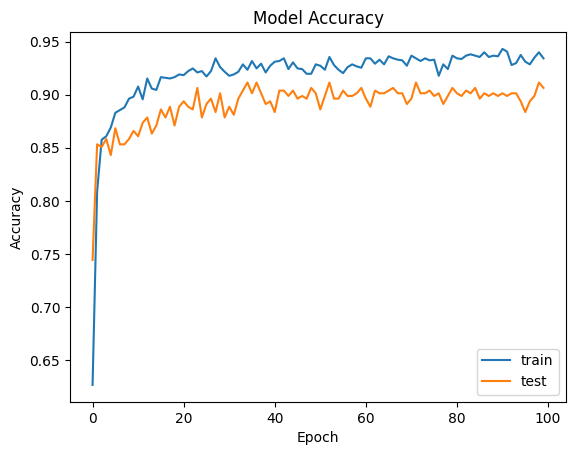

In [12]:
# graficar la precisión de entrenamiento y prueba
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Classify all Red Giants

In [13]:
df_rg = df = pd.read_csv("../../new/normalized/RG.csv", header=None)

import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_rg)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([2 for _ in range(69146)], y_pred)
print(cm)


2161/2161 [==============================] - 2s 772us/step
[[    0     0     0]
 [    0     0     0]
 [  336  1059 67751]]


In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(X_test)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix(y_test, y_pred)
print(cm)


13/13 [==============================] - 0s 1ms/step
[[ 33   3   4]
 [  6  92  17]
 [  1   6 233]]


In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.8250    0.8250    0.8250        40
           1     0.9109    0.8000    0.8519       115
           2     0.9173    0.9708    0.9433       240

    accuracy                         0.9063       395
   macro avg     0.8844    0.8653    0.8734       395
weighted avg     0.9061    0.9063    0.9047       395



In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9063291139240506


In [17]:
from sklearn.metrics import cohen_kappa_score, classification_report

print("Cohen's kappa: ", cohen_kappa_score(y_test, y_pred))

Cohen's kappa:  0.8214416615760538


In [18]:
print("size of the splits")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.size)
print("y_pred: ", y_pred.size)

size of the splits
X_train:  (1580, 343)
X_test:  (395, 343)
y_test:  395
y_pred:  395


# Save model

In [13]:
# Save the model to a single file
model.save( './rna_unbalance.keras', save_format='keras_v3')

# Suspected Symbiotic Stars v1

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v1/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 26ms/step
[[13  1  1]
 [ 0  0  0]
 [ 0  0  0]]


In [30]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v1/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,4687286621186701568,0.8211,0.1205,0.0584,0
1,4651824725526390016,0.5211,0.4222,0.0568,0
2,3321366590173335424,0.4454,0.2368,0.3178,0
3,5410876219867043072,0.9901,0.0098,0.0001,0
4,3575939163051304192,0.9876,0.0123,0.0001,0


In [31]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v1/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,RAW 1691,LIN 521,C*,C,Gaia DR2 4687286621186701568,RAW 1691|LIN 521|2MASS J01183570-7242213|OGLE ...,C*|Em*|LP*|LP*|Em*|MIR|NIR|*|C*?|LP?,4687286621186701568
1,[BE74] 583,[BE74] 583,LongPeriodV*,G/Ke:,Gaia DR2 4651824725526390016,2MASS J05265014-7106350|EROS2-star lm058-2n-25...,LP*|Em*|NIR|V*|*,4651824725526390016
2,StHA 55,EM* StHA 55,Mira,NaN,Gaia DR3 3321366590173335424,IRAS 05440+0642|ASAS J054642+0643.7|ASAS J0546...,Mi*|LP*|V*|LP*|SB*|LP*|MIR|V*|Em*|NIR|*|C*?|IR...,3321366590173335424
3,ZZ CMi,V* ZZ CMi,LongPeriodV*,M6I-IIep,Gaia DR3 3155368612444708096,BD+09 1633|AN 306.1934|DO 2156|GCRV 4915|G...,LP*|NIR|V*|*|IR|LP?,3155368612444708096
4,WRAY 16−51,WRAY 16-51,LongPeriodV*,M4,Gaia DR2 5410876219860836224,IRAS 09316-4621|AKARI-IRC-V1 J0933295-463450|D...,LP*|NIR|MIR|Em*|PN|*|IR,5410876219867043072


In [32]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,RAW 1691,LIN 521,4687286621186701568,0.8211,0.1205,0.0584,0
1,[BE74] 583,[BE74] 583,4651824725526390016,0.5211,0.4222,0.0568,0
2,StHA 55,EM* StHA 55,3321366590173335424,0.4454,0.2368,0.3178,0
3,WRAY 16−51,WRAY 16-51,5410876219867043072,0.9901,0.0098,0.0001,0
4,NSV 05572,V* VX Crv,3575939163051304192,0.9876,0.0123,0.0001,0


In [33]:
out_name = 'rna_unbalanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v1/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)

# Suspected Symbiotic Stars v2

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix

df_sus_sy = pd.read_csv("../../new/candidate_symbiotic_stars_v2/normalized/Suspected_SY.csv", header=None)

# predecir las probabilidades para los datos de prueba
y_probs = model.predict(df_sus_sy)
y_pred = np.argmax(y_probs, axis=-1)
cm = confusion_matrix([0 for _ in range(len(df_sus_sy))], y_pred, labels=[0, 1, 2])
print(cm)

1/1 [==============================] - 0s 16ms/step
[[14  2  1]
 [ 0  0  0]
 [ 0  0  0]]


In [35]:
df_sus_sy_normalized = pd.read_csv("../../new/candidate_symbiotic_stars_v2/calibrated_data/Suspected_SY.csv")

df5 = pd.DataFrame(y_probs)
df5 = df5.round(4)
df5['label'] = y_pred
df5.insert(0, 'source_id', df_sus_sy_normalized['source_id'])
df5.head(5)

,source_id,0,1,2,label
0,6204217186929931520,0.0228,0.9771,0.0000,1
1,4061952680197028224,0.9027,0.0866,0.0107,0
2,670455944074475008,0.5603,0.0777,0.3620,0
3,4068755633500598272,0.0082,0.0626,0.9292,2
4,2060829659152816768,0.0782,0.7818,0.1399,1


In [36]:
df6 = pd.read_csv('../../new/candidate_symbiotic_stars_v2/built_dataset/suspected_SY_dataset.csv')
df6.head(5)

,FIND_NAME,MAIN_ID,OTYPE,SP_TYPE,ID_Gaia,IDS,OTYPES,Gaia DR3
0,V748 Cen,V* V748 Cen,EclBin,Ae,Gaia DR3 6204217186929931520,CD-32 10517|ALS 18924|CRTS J145936.6-332503|CS...,EB*|Ro*|NIR|V*|Em*|*,6204217186929931520
1,WRAY 16-294,WRAY 16-294,LongPeriodV*,K5,Gaia DR2 4061952680197028224,2MASS J17391381-2538050|DENIS J173913.8-253805...,LP*|PN|NIR|Em*|*|C*?|ISM|LP?,4061952680197028224
2,DASCH J075731.1+201735,ASAS J075731+2017.6,LongPeriodV*,M0III,Gaia DR2 670455944074475008,2MASS J07573112+2017347|ASAS J075731+2017.6|DA...,SB*|LP*|NIR|V*|*|Opt,670455944074475008
3,ASAS J174600-2321.3,ASAS J174600-2321.3,LongPeriodV*_Candidate,F0I,Gaia DR2 4068755633500598272,2MASS J17460018-2321163|ASAS J174600-2321.3|ER...,NIR|V*|*|LP?,4068755633500598272
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,PlanetaryNeb_Candidate,NaN,Gaia DR2 2060829659152816768,2MASS J20155096+3730042|AKARI-IRC-V1 J2015509+...,NIR|*|C*?|IR|LP?|PN?,2060829659152816768


In [37]:
# Filtro de data frames
df_filtered = df6.merge(df5, left_on=['Gaia DR3'], right_on=['source_id'], how='inner', indicator=True)
df_filtered = df_filtered[df_filtered['_merge'] == 'both']
df_filtered = df_filtered.iloc[:, [0, 1, 7, 9, 10, 11, 12]]
df_filtered.head(5)

,FIND_NAME,MAIN_ID,Gaia DR3,0,1,2,label
0,V748 Cen,V* V748 Cen,6204217186929931520,0.0228,0.9771,0.0000,1
1,WRAY 16-294,WRAY 16-294,4061952680197028224,0.9027,0.0866,0.0107,0
2,DASCH J075731.1+201735,ASAS J075731+2017.6,670455944074475008,0.5603,0.0777,0.3620,0
3,ASAS J174600-2321.3,ASAS J174600-2321.3,4068755633500598272,0.0082,0.0626,0.9292,2
4,IPHASJ201550.96+373004.2,IRAS 20140+3720,2060829659152816768,0.0782,0.7818,0.1399,1


In [38]:
out_name = 'rna_unbalanced.csv'
out_dir = '../../new/candidate_symbiotic_stars_v2/output'
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

fullname = os.path.join(out_dir, out_name)
df_filtered.to_csv(fullname, header=True, index=False)